In [40]:
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd

In [41]:
iris = load_iris()

In [42]:
X =iris.data
y = iris.target

In [43]:
X.shape

(150, 4)

<Axes: >

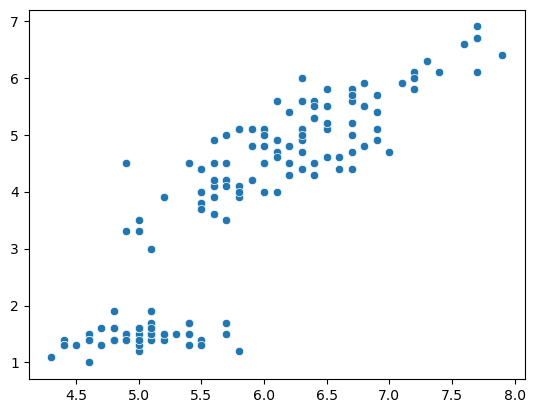

In [44]:
# visualize
sns.scatterplot(x=X[:,0],y=X[:,2])

In [45]:
# Scaling our data 
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [61]:
# Optional Dimensionality reduction using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)


In [62]:
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    # 2. Set n_init='auto' or 10 to satisfy the latest library updates
    # 3. random_state ensures you get the same result every time you run it
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

<Axes: >

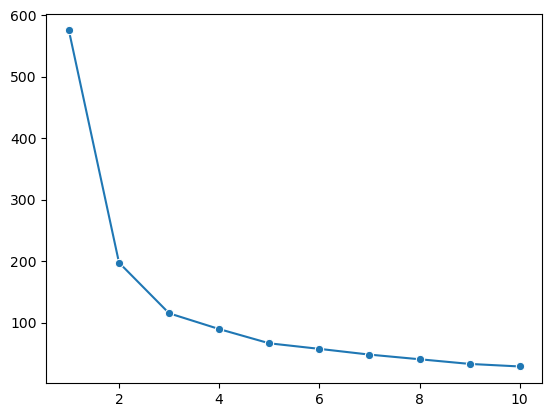

In [63]:
sns.lineplot(x=range(1,11),y=wcss,marker='o')

In [51]:
from kneed import KneeLocator   # this module is used to automatically find out the K value.
knee=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [54]:
print(f"The optimal number of clusters is: {knee.elbow}")

The optimal number of clusters is: 3


<Axes: >

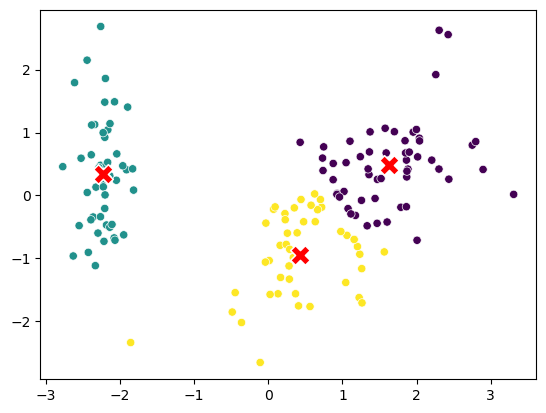

In [74]:
# KMeans
kmeans = KMeans(n_clusters=3,random_state=10)
labels = kmeans.fit_predict(pca_data)
sns.scatterplot(x=pca_data[:,0],y=pca_data[:,1],c=labels)
sns.scatterplot(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],marker="X",c="red",s=200)